In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Read file into DataFrame
gladiator_df = pd.read_csv('gladiator_data.csv', low_memory=False)

gladiator_df


,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107459,Faustus Silanus,24,374,Numidia,172,61,Thraex,3,0,Speed,...,3,Aggressive,Excellent,Glory,Criminal,Medium,Aggressive,Medium,Intimidating,False
107460,Florianus Valentinian,44,355,Gaul,167,71,Murmillo,15,5,Strength,...,20,Fearful,Fair,Wealth,Criminal,Medium,Balanced,Medium,Intimidating,False
107461,Postumius Valens,31,368,Gaul,161,87,Secutor,9,1,Novice,...,10,Fearful,Excellent,Wealth,Laborer,Medium,Aggressive,High,Intimidating,True
107462,Paelignus Ninnius,43,356,Numidia,168,81,Hoplomachus,9,4,Endurance,...,13,Aggressive,Good,Vengeance,Unemployed,Low,Balanced,Low,Charismatic,False


In [3]:
gladiator_df.columns

Index(['Name', 'Age', 'Birth Year', 'Origin', 'Height', 'Weight', 'Category',
       'Wins', 'Losses', 'Special Skills', 'Weapon of Choice', 'Patron Wealth',
       'Equipment Quality', 'Public Favor', 'Injury History',
       'Mental Resilience', 'Diet and Nutrition', 'Tactical Knowledge',
       'Allegiance Network', 'Battle Experience', 'Psychological Profile',
       'Health Status', 'Personal Motivation', 'Previous Occupation',
       'Training Intensity', 'Battle Strategy', 'Social Standing',
       'Crowd Appeal Techniques', 'Survived'],
      dtype='object')

In [ ]:
# Verify datatypes
gladiator_df.dtypes


Name                        object
Age                          int64
Birth Year                   int64
Origin                      object
Height                       int64
Weight                       int64
Category                    object
Wins                         int64
Losses                       int64
Special Skills              object
Weapon of Choice            object
Patron Wealth               object
Equipment Quality           object
Public Favor               float64
Injury History              object
Mental Resilience          float64
Diet and Nutrition          object
Tactical Knowledge          object
Allegiance Network          object
Battle Experience            int64
Psychological Profile       object
Health Status               object
Personal Motivation         object
Previous Occupation         object
Training Intensity          object
Battle Strategy             object
Social Standing             object
Crowd Appeal Techniques     object
Survived            

In [ ]:
# Remove the rows with missing data
clean_gladiator_df = gladiator_df.dropna(how="any")
clean_gladiator_df



,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107459,Faustus Silanus,24,374,Numidia,172,61,Thraex,3,0,Speed,...,3,Aggressive,Excellent,Glory,Criminal,Medium,Aggressive,Medium,Intimidating,False
107460,Florianus Valentinian,44,355,Gaul,167,71,Murmillo,15,5,Strength,...,20,Fearful,Fair,Wealth,Criminal,Medium,Balanced,Medium,Intimidating,False
107461,Postumius Valens,31,368,Gaul,161,87,Secutor,9,1,Novice,...,10,Fearful,Excellent,Wealth,Laborer,Medium,Aggressive,High,Intimidating,True
107462,Paelignus Ninnius,43,356,Numidia,168,81,Hoplomachus,9,4,Endurance,...,13,Aggressive,Good,Vengeance,Unemployed,Low,Balanced,Low,Charismatic,False


In [ ]:
# Calculate Age range 
print("Age:")
print(f"The count is {gladiator_df['Age'].count()}")
print(f"The minimum is {gladiator_df['Age'].min()}")
print(f"The maximum is {gladiator_df['Age'].max()}")
print(f"The mean is {gladiator_df['Age'].mean()}")

Age:
The count is 107464
The minimum is 18
The maximum is 45
The mean is 31.509556688751584


In [ ]:
#Make my variable 
age = gladiator_df['Age']

In [ ]:
# Calculate the measures of central tendency
mean_numpy = np.mean(age)
print(f"The mean age of the gladiators is {mean_numpy}")

median_numpy = np.median(age)
print(f"The median age of the gladiators is {median_numpy}")

mode_scipy = sts.mode(age)
print(f"The mode age of the gladiators is {mode_scipy}")

The mean age of the gladiators is 31.509556688751584
The median age of the gladiators is 31.0
The mode age of the gladiators is ModeResult(mode=27, count=3989)


In [ ]:
# Calculate variance and standard deviation using NumPy
variance = np.var(age)
print(f"The population variance using the NumPy module is {variance}")

stand_dev = np.std(age)
print(f"The population standard deviation using the NumPy module is {stand_dev}")

The population variance using the NumPy module is 65.06394872033249
The population standard deviation using the NumPy module is 8.066222704607931


In [ ]:
# Define the age ranges and labels
age_bins = [15, 20, 25, 30, 35, 40, 45]
age_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45']

# Create a new column 'Age Group' using pd.cut
gladiator_df['Age Group'] = pd.cut(gladiator_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the DataFrame with the new column
gladiator_df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Age Group
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False,21-25
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True,36-40
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True,26-30
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True,21-25
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True,26-30


In [ ]:
# Filter data so it only includes gladiators who survived
survive_df = pd.DataFrame(clean_gladiator_df.loc[clean_gladiator_df['Survived']==True,:])
survive_df

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True
6,Hilarianus Nero,20,30,Greece,156,73,Secutor,5,1,Speed,...,6,Stoic,Excellent,Freedom,Soldier,Medium,Balanced,High,Humble,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107451,Nasennius Caelius,37,358,Numidia,169,95,Murmillo,13,0,Endurance,...,13,Stoic,Good,Glory,Entertainer,Medium,Balanced,Low,Intimidating,True
107452,Sertorius Festinius,26,370,Numidia,168,89,Murmillo,14,3,Tactics,...,17,Fearful,Good,Wealth,Entertainer,Medium,Defensive,Medium,Charismatic,True
107454,Duronius Cilnius,19,377,Germania,171,79,Provocator,5,2,Endurance,...,7,Calculative,Excellent,Freedom,Criminal,Medium,Aggressive,Low,Intimidating,True
107458,Sornatius Geminius,36,361,Gaul,175,79,Hoplomachus,12,0,Speed,...,12,Stoic,Fair,Survival,Laborer,Medium,Aggressive,Medium,Flamboyant,True


In [ ]:
#Make my variable 
age_2 = survive_df['Age']

# Calculate the measures of central tendency
mean_numpy = np.mean(age_2)
print(f"The mean age of the gladiators who survived is {mean_numpy}")

median_numpy = np.median(age_2)
print(f"The median age of the gladiators who survived is {median_numpy}")

mode_scipy = sts.mode(age_2)
print(f"The mode age of the gladiators who survived is {mode_scipy}")

# Calculate variance and standard deviation using NumPy
variance = np.var(age_2)
print(f"The population variance using the NumPy module is {variance}")

stand_dev = np.std(age_2)
print(f"The population standard deviation using the NumPy module is {stand_dev}")



The mean age of the gladiators who survived is 32.5250378214826
The median age of the gladiators who survived is 33.0
The mode age of the gladiators who survived is ModeResult(mode=32, count=2176)
The population variance using the NumPy module is 60.101907146822846
The population standard deviation using the NumPy module is 7.752541979687878


In [ ]:
# Categorize by age 
agerange = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45']

In [ ]:
# Define the age ranges and labels
age_bins = [15, 20, 25, 30, 35, 40, 45]  
age_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45']  

# Create a new column 'Age Group' using pd.cut
survive_df['Age Group'] = pd.cut(survive_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the DataFrame with the new column
survive_df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Age Group
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True,36-40
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True,26-30
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True,21-25
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True,26-30
6,Hilarianus Nero,20,30,Greece,156,73,Secutor,5,1,Speed,...,Stoic,Excellent,Freedom,Soldier,Medium,Balanced,High,Humble,True,15-20


In [ ]:
#Count on age range
survive_df['Age Group'].value_counts()

Age Group
31-35    10538
41-45    10511
36-40    10309
26-30     9532
21-25     8125
15-20     3865
Name: count, dtype: int64

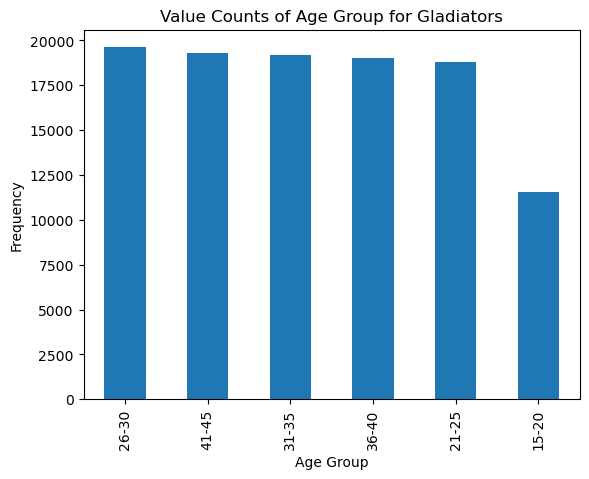

In [ ]:
age_group_counts = gladiator_df['Age Group'].value_counts()
age_group_counts.plot(kind='bar')
plt.title('Value Counts of Age Group for Gladiators')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

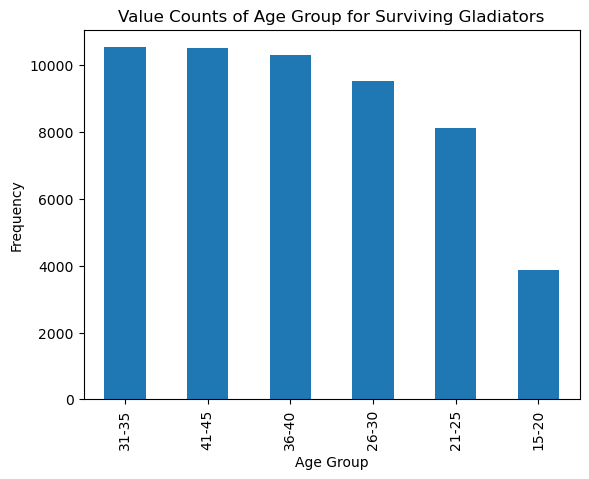

In [ ]:
age_group_counts = survive_df['Age Group'].value_counts()
age_group_counts.plot(kind='bar')
plt.title('Value Counts of Age Group for Surviving Gladiators')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

C:\Users\maryp\AppData\Local\Temp\ipykernel_12036\3628882951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = gladiator_df.groupby(['Age Group', 'Survived']).size().unstack()
C:\Users\maryp\AppData\Local\Temp\ipykernel_12036\3628882951.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group') # Changed legend title to reflect hue


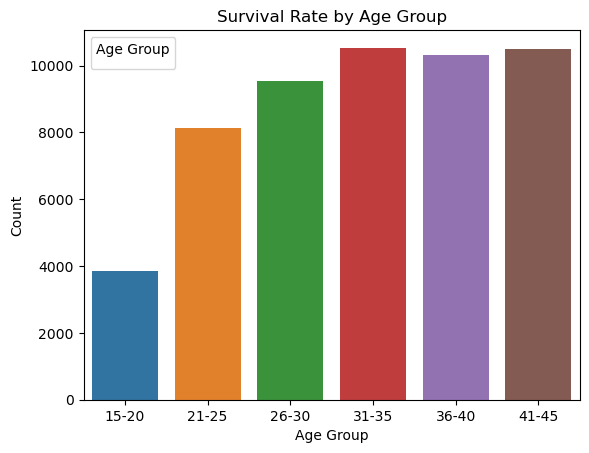

In [ ]:
# Group the DataFrame by 'Age Group' and 'Survived' and get the size of each group - I used Colab and my tutoring session for troubleshooting S
age_survival_counts = gladiator_df.groupby(['Age Group', 'Survived']).size().unstack()

# Reset the index to make 'Survived' a column
age_survival_counts = age_survival_counts.reset_index()

# Rename the True column to Survived_Count for clarity
age_survival_counts = age_survival_counts.rename(columns={True: 'Survived_Count', False: 'Not_Survived_Count'})

# Create a bar plot using seaborn, specifying the correct column names
sns.barplot(data=age_survival_counts, x='Age Group', y='Survived_Count', hue='Age Group')  
# Use 'Survived_Count' for y-axis as it contains the count of survived gladiators
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Age Group') # Changed legend title to reflect hue
plt.show()